In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
aData = pd.read_csv('Social_Network_Ads.csv')
aData

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


The above dataset show the the user able to buy a product or not

In [ ]:
aData.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
aData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
aData.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
aData.duplicated().sum()

np.int64(0)

In [ ]:
aData['Gender'] = aData['Gender'].astype(pd.StringDtype())

In [ ]:
aData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    string
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), string(1)
memory usage: 15.8 KB


In [ ]:
aData

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# convert the gender to encoded form
aData['Gender_coded'] = aData['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
aFeaturesData = aData[['Age', 'EstimatedSalary','Gender_coded']]
aTarget = aData['Purchased']

In [ ]:
gender_correlation = aFeaturesData.corr()['Gender_coded']
print(gender_correlation)

Age               -0.073741
EstimatedSalary   -0.060435
Gender_coded       1.000000
Name: Gender_coded, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(aFeaturesData, aTarget, test_size=0.25, random_state=0)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [68]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
X_train['Age'].values

array([44, 32, 38, 32, 52, 53, 39, 38, 36, 36, 35, 35, 42, 47, 59, 49, 45,
       31, 46, 47, 26, 60, 38, 40, 42, 35, 48, 48, 38, 29, 26, 60, 24, 42,
       46, 28, 39, 28, 41, 45, 33, 20, 31, 42, 35, 33, 40, 51, 46, 35, 38,
       36, 37, 38, 60, 20, 57, 42, 26, 46, 35, 21, 28, 41, 37, 27, 39, 28,
       31, 25, 35, 37, 35, 47, 35, 48, 26, 25, 52, 51, 35, 33, 30, 48, 41,
       48, 31, 31, 43, 59, 18, 36, 42, 47, 26, 40, 46, 59, 46, 35, 28, 40,
       59, 57, 52, 47, 53, 35, 58, 45, 23, 46, 42, 28, 38, 26, 29, 37, 22,
       48, 49, 38, 27, 46, 48, 26, 35, 39, 24, 32, 46, 35, 56, 47, 40, 32,
       19, 25, 35, 28, 50, 40, 50, 35, 40, 46, 39, 20, 29, 31, 47, 40, 34,
       38, 42, 47, 39, 19, 37, 36, 41, 36, 48, 36, 51, 27, 38, 39, 22, 33,
       48, 58, 53, 32, 54, 30, 58, 26, 45, 24, 40, 33, 44, 22, 33, 43, 24,
       46, 35, 54, 48, 35, 37, 23, 37, 31, 33, 45, 30, 19, 49, 39, 35, 39,
       24, 41, 29, 54, 35, 37, 29, 31, 42, 30, 52, 50, 56, 29, 30, 26, 33,
       41, 36, 55, 48, 41

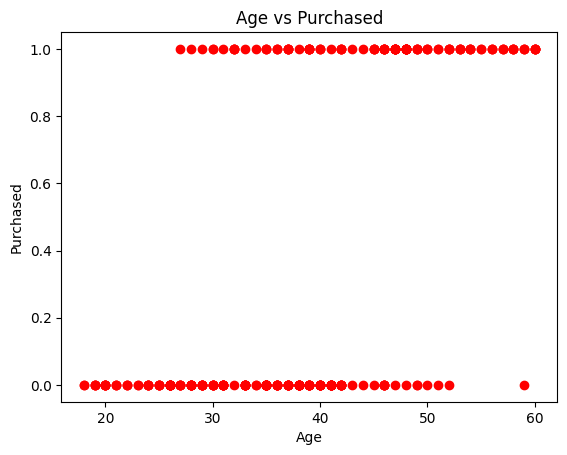

In [67]:
plt.scatter(X_train['Age'].values, y_train, color='red')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Age vs Purchased')
plt.show()

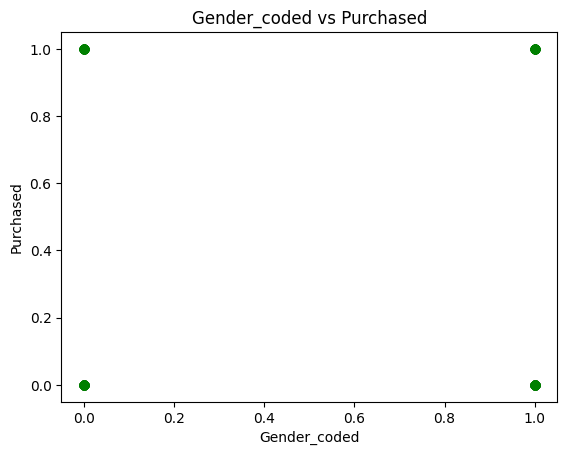

In [ ]:
plt.scatter(X_train['Gender_coded'].values, y_train, color='green')
plt.xlabel('Gender_coded')
plt.ylabel('Purchased')
plt.title('Gender_coded vs Purchased')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[64  4]
 [ 7 25]]


In [ ]:
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("\nTrue Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)


True Negatives (TN): 64
False Positives (FP): 4
False Negatives (FN): 7
True Positives (TP): 25


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.89
Error Rate: 0.10999999999999999
Precision: 0.8620689655172413
Recall: 0.78125
